## Script that runs CO2 emissions on dummy data
### Replicates spreadsheet made by Chris Barry called "ResCO2em_v1_GawLan.xlsx"

In [11]:
from emissions import CarbonDioxideEmission, MonthlyTemperature
from emissions import Landuse, Climate, SoilType

In [12]:
mt = MonthlyTemperature([10.56,11.99,15.46,18.29,20.79,22.09,22.46,22.66,21.93,19.33,15.03,11.66])

In [13]:
# Define hypothetical input data
input_data = {"catchment_area": 78203.04518,
              "reservoir_area": 0.5647019517,
              "area_fractions": [0,0,0,0,0,0,0,1],
              "eff_temp": mt.calculate_eff_temp(),
              "soil_carbon": 10.2276688453159,
              "reservoir_tp": 10.197}

In [14]:
# Instantiate first emission calculatoin with the input data
em_1 = CarbonDioxideEmission(**input_data)

In [15]:
# Calculate emission profile
year_profile = (1, 5, 10, 20, 30, 40, 50, 100)

prof = em_1.calculate_profile(
    climate=Climate.TROPICAL,
    soil_type=SoilType.MINERAL,
    years = year_profile)
print('Emissions (g CO2eq m-2 yr-1): ', *["%.2f" % flux for flux in prof], sep='\n- ')    

Emissions (g CO2eq m-2 yr-1): 
- 735.83
- 421.58
- 329.89
- 256.95
- 221.41
- 198.92
- 182.89
- 140.00


In [16]:
tot_emission = em_1.calculate_total(climate=Climate.TROPICAL, soil_type=SoilType.MINERAL)
print('Total Emission (g CO2eq m-2 yr-1): ', "%.2f" % tot_emission)

Total Emission (g CO2eq m-2 yr-1):  216.25


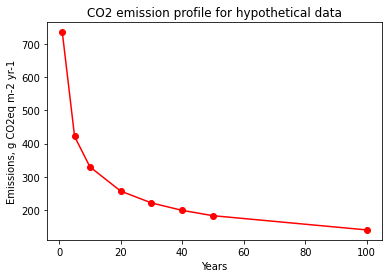

In [17]:
import matplotlib.pyplot as plt
plt.plot(year_profile, prof, 'r-o') 
plt.xlabel('Years') 
plt.ylabel('Emissions, g CO2eq m-2 yr-1') 
plt.title('CO2 emission profile for hypothetical data') 
plt.show()